In [1]:
import gym

env = gym.make("CartPole-v1")
env.seed(0)

[0]

In [2]:
from td_actor_critic import TDActorCritic
from aac import AAC
from shared_aac import SharedAAC
from ppo import PPO

actor = PPO(env)

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


D:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [3]:
def get_experiences(env, actor, episodes=50):
    for episode in range(0, episodes):
        obs = env.reset()
        done = False
        while not done:
            action = actor.act(obs)
            obs2, reward, done, _ = env.step(action)
            actor.remember(obs, action, reward, obs2, done)
            obs = obs2

In [4]:
import itertools

def train(env, actor, episodes=100):
    returns = []
    mean = 0
    for episode in range(1, episodes+1):
        obs = env.reset()
        score = 0
        for t in itertools.count():
            action, probs = actor.act(obs)
            obs2, reward, done, _ = env.step(action)
            actor.remember(obs, action, probs, reward, obs2, done)
            actor.train(128)
            obs = obs2
            score += reward
            if done:
                returns.append(score)
                mean += score/10
                if episode % 10 == 0:
                    print("Episode: " + str(episode) + ", Mean Score: " + str(mean))
                    if mean > 450:
                        return returns
                    mean = 0
                break
    
    return returns

In [5]:
# get_experiences(env, actor)

In [6]:
returns = train(env, actor, episodes=300)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Episode: 10, Mean Score: 21.3
Episode: 20, Mean Score: 32.0
Episode: 30, Mean Score: 37.49999999999999
Episode: 40, Mean Score: 67.1
Episode: 50, Mean Score: 59.70000000000001
Episode: 60, Mean Score: 65.2
Episode: 70, Mean Score: 108.8
Episode: 80, Mean Score: 122.70000000000002
Episode: 90, Mean Score: 112.5
Episode: 100, Mean Score: 102.50000000000001
Episode: 110, Mean Score: 128.70000000000002
Episode: 120, Mean Score: 130.79999999999998
Episode: 130, Mean Score: 173.4
Episode: 140, Mean Score: 123.19999999999999
Episode: 150, Mean Score: 217.29999999999998
Episode: 160, Mean Score: 350.99999999999994
Episode: 170, Mean Score: 441.90000000000003
Episode: 180, Mean Score: 398.09999999999997
Episode: 190, Mean Score: 416.1
Episode: 200, Mean Score: 500.0


In [9]:
import imageio
import numpy as np

def run_episode(env, model, render=False, record=False):
    images = []
    obs = env.reset()
    for t in itertools.count():
        if record:
            images.append(env.render(mode='rgb_array'))
        if render:
            env.render()
        action, probs = model.act(obs)
        obs, reward, done, info = env.step(action)
        if done:
            print("Score: " + str(t + 1))
            env.close()
            break
            
    if record:
        imageio.mimsave('img/SharedA2C.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [10]:
run_episode(env, actor, render=True, record=False)

Score: 500


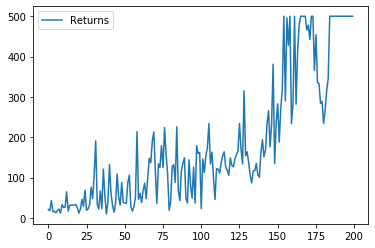

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(returns)), returns, label='Returns')
plt.legend()
plt.show()